<center>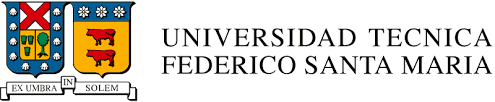</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477/577 Redes Neuronales Artificiales - 2022-2 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, imputación de datos y preprocesamientos
* Redes Densas Feed Forward
* Regularización y Dropout
* Vanishing Gradient
* Learn Rate Decay
* Optimizadores


**Formalidades**  
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<maryon.morales@sansano.usm.cl>, <sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-395/477/577-2022-2 Tarea 1]. Invitar como colaborador a los usuarios de github "ssanchezl" y "maryonmorales" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 07 de Octubre, en horario de clases.
* Fecha de entrega: 08 de Octubre. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>


* 1 - Redes Feed Forward para predicción de diabetes.

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo, solo son guias y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con *comentarios* en celdas _Markdown_, con los comentarios de la pregunta y con cualquier análisis, fórmula (en $ \LaTeX $) o explicación que les parezca relevante para justificar sus procedimientos. *No respondan las preguntas en comentarios en el código*.
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará tanto la elección en si. En cambio la argumentación detrás de la elección será lo más ponderado.
Si algún modelo se demora demasiado en correr en su máquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, incluso con la opción de aceleración con GPU (particularmente útil para los modelos más grandes), esto puede ser relevante para las máquinas más lentas al momento de realizar exploraciones con _K-folds_ o las redes más grandes. Existe también la posibilidad de utilizar _Google Cloud Plataform_ o _Amazon Web Service_, donde tienen máquinas aceleradas con GPU; maquinas ya configuradas para _deep leraning_ pueden encontrarse en el _Marketplace_ de cada proveedor de servicios.

# 1 - Redes Feed Forward para predicción de diabetes

De las redes neuronales artificiales más simples se encuentran las redes densas o Feed Forward, donde todas las neuronas de una capa estan conectadas a todos los inputs y envían su señal de activación a todas las neuronas de la siguiente capa. Estas redes, si bien son las más simples, suelen tener desempeños bastante buenos, y en muchas aplicaciones reales son utilizadas, ya sea por si solas o en combinación con otros modelos. Además, son las redes donde más facil se pueden observar muchos de los fenómenos que se han descubierto a lo largo de los años de desarrollo de esta area del conocimiento, tanto por ser de las redes vigentes más antiguas y por su estructura relativamente simple. En esta primera parte de la tarea exploraremos las redes densas y algunos de sus hiperparámetros más relevantes como la profundidad, el número de unidades; estudiaremos también algunos métodos de regularización y evidenciaremos el problema del vanishing gradient y el exploding gradient, viendo también algunos optimizadores existentes.

Para realizar esto, utilizaremos una base de datos de variables médicas predictoras de la diabetes en mujeres y la variable objetivo (presencia o ausencia de diabetes), la cual se encuentra disponible en Kaggle, en la siguiente URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, el nivel de insulina, la edad, entre otros. Nuesta tarea durante esta pregunta será predecir si la persona tiene o no de diabetes a partir de algunas de las otras variables presentes en el dataset. Para esto primero deberán explorar los atributos del dataset, imputar los valores que falten o eliminarlos en caso que estime conveniente, y luego preprocesar los datos de forma eficiente para que así puedan ser utilizados por una red neuronal. Una vez separados los datos de entrenamiento, validación y test, procederemos a entrenar diferentes modelos, comparandolos y evaluando sus desempeños.

## 1.a Carga de datos y primeros análisis
Para cargar los datos, puede descargarlos desde el link de Kaggle, o puede descargarlos desde su jupyter nootebok como muestra el código a continuación. Para obtener más información acerca de como descargar datasets directamente desde la API de Kaggle puede dirigirse a la documentación que se encuentra en el siguiente link: https://github.com/Kaggle/kaggle-api#download-dataset-files. Para usar la API de Kaggle dentro de Google Colab puede serle de utilidad el siguiente link: https://galhever.medium.com/how-to-import-data-from-kaggle-to-google-colab-8160caa11e2.

Luego de descomprimir el archivo descargado cargue los datos en un *Dataframe* como muestra el código. Explore superficialmente los datos utilizando los metodos .head, .describe o .info del *Dataframe*.

In [ ]:
import pandas as pd

df = pd.read_csv("diabetes.csv")

# . . .

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Identifique y comente sobre las características de la variable objetivo (target) que sean relevantes para el problema. ¿Que puede decir acerca de la distribución de las clases?, ¿Están balanceadas? Explique usando gráficos que le parezcan pertinentes para representar el balance de clases. 



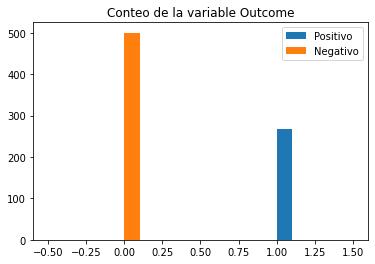

In [ ]:
import matplotlib.pyplot as plt

pos_diab = df[df['Outcome'] != 0]
neg_diab = df[df['Outcome'] == 0]
# print(pos_diab)
plt.title("Conteo de la variable Outcome")
plt.hist(pos_diab["Outcome"], label='Positivo')
plt.hist(neg_diab["Outcome"], label='Negativo')
plt.legend()
plt.show()

# . . .

¿Qué puede observar de los datos, tiene sentido que algunos valores de ciertas variables predictoras tengan valor 0?, 

Identifique cuales son las columnas con datos faltantes que fueron imputadas con el valor 0. ¿Tiene sentido estos atributos tengan valores 0? Investigue el rango de valores que puede tomar cada atributo en el dataset, y comente sus principales características.

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
count = (df['Glucose'] == 0).sum()
print('Cuenta de 0 en GLucosa : ', count)
count = (df['BloodPressure'] == 0).sum()
print('Cuenta de 0 en BloodPressure : ', count)
count = (df['SkinThickness'] == 0).sum()
print('Cuenta de 0 en SkinThickness : ', count)
count = (df['Insulin'] == 0).sum()
print('Cuenta de 0 en Insulin : ', count)
count = (df['BMI'] == 0).sum()
print('Cuenta de 0 en BMI : ', count)

Cuenta de 0 en GLucosa :  5
Cuenta de 0 en BloodPressure :  35
Cuenta de 0 en SkinThickness :  227
Cuenta de 0 en Insulin :  374
Cuenta de 0 en BMI :  11


## 1.b Train Test Split

En esta pregunta nos ocuparemos de separar el dataset en los conjuntos de entrenamiento, validación y test y estandarizar los datos. Para esto puede utilizar la librería sklearn, en particular la función `train_test_split`. Para esto separe primero el dataset en  $X$  e  $Y$. Luego separe los datos considerando un  70%  de ellos para entrenamiento, un  20%  para validación y un  10%  para test. ¿Qué estamos tratando de representar en esta separación en conjuntos de entrenamiento, validación y test?

In [ ]:
from random import seed
from sklearn.model_selection import train_test_split
# . . . 

y = df['Outcome'].to_numpy(copy=True)
X = df.drop(columns=['Outcome'])

X_tr, X_test, y_tr, y_test = train_test_split(
     X, y, test_size=0.10)

X_tr, X_val, y_tr, y_val = train_test_split(
     X_tr, y_tr, test_size=0.22)

## 1.c Valores faltantes e imputación

Tomando en cuenta solamente el conjunto de entrenamiento, considere los valores imputados con 0 que encontró en la pregunta 1.a y reemplacelos por `NaN`, para esto utilice el método `replace`. Cuente cuantos datos faltantes hay por cada atributo y grafíque. Cree 3 conjuntos de entrenamiento nuevos a partir del resultado de reemplazar con `NaN`:

1.   Conserve el conjunto de entrenamiento original intacto: $X_o$
2.   Reemplace los valores faltantes de cada columna por la media de estos: $X_1$
3.   Reemplace los valores faltantes de cada columna por la mediana de estos: $X_2$
4.   Reemplace los valores faltantes de cada columna utilizando el método MICE [1][2]: $X_3$

Responda las siguientes preguntas:

*   ¿Qué es la imputación de datos?
*   ¿Cuáles son las ventajas y desventajas de los 3 métodos recién utilizados versus sin imputar ($X_o$)?
*   ¿Qué se necesita para ejecutar cada uno de los 3 métodos de imputación de datos?
*   ¿Qué puede decir de los conjuntos resultantes?¿Resuelven el problema de los datos faltantes?





[1] https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.169.5745&rep=rep1&type=pdf

[2] https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html?highlight=mice




In [ ]:
import numpy as np
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  #noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
X1 = X_tr.mean()
X2 = X_tr.median()

X_tr[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = X_tr[['Glucose',
'BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

X_tr1 = X_tr.copy()
X_tr2 = X_tr.copy()


X_tr1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = X_tr1[['Glucose',
'BloodPressure','SkinThickness','Insulin','BMI']].replace(np.NaN,X1)

X_tr2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = X_tr2[['Glucose',
'BloodPressure','SkinThickness','Insulin','BMI']].replace(np.NaN,X2)

lr = LinearRegression()
X_tr3 = IterativeImputer(estimator = lr, tol=1e-10,max_iter=30, verbose=2, imputation_order='ascending').fit_transform(X_tr)

# imp_mean.transform(X_tr)


[IterativeImputer] Completing matrix with shape (538, 8)
[IterativeImputer] Ending imputation round 1/30, elapsed time 0.03
[IterativeImputer] Change: 199.36963688536903, scaled tolerance: 8.46e-08 
[IterativeImputer] Ending imputation round 2/30, elapsed time 0.04
[IterativeImputer] Change: 8.228803693454907, scaled tolerance: 8.46e-08 
[IterativeImputer] Ending imputation round 3/30, elapsed time 0.06
[IterativeImputer] Change: 3.431163567671078, scaled tolerance: 8.46e-08 
[IterativeImputer] Ending imputation round 4/30, elapsed time 0.07
[IterativeImputer] Change: 1.467809483871065, scaled tolerance: 8.46e-08 
[IterativeImputer] Ending imputation round 5/30, elapsed time 0.09
[IterativeImputer] Change: 0.7735238337021464, scaled tolerance: 8.46e-08 
[IterativeImputer] Ending imputation round 6/30, elapsed time 0.10
[IterativeImputer] Change: 0.4390552472539575, scaled tolerance: 8.46e-08 
[IterativeImputer] Ending imputation round 7/30, elapsed time 0.12
[IterativeImputer] Change: 

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
print(X_tr3)

[[ 0.00000000e+00  1.24000000e+02  7.00000000e+01  2.00000000e+01
   1.79539957e+02  2.74000000e+01  2.54000000e-01  3.60000000e+01]
 [ 3.00000000e+00  8.40000000e+01  6.80000000e+01  3.00000000e+01
   1.06000000e+02  3.19000000e+01  5.91000000e-01  2.50000000e+01]
 [ 7.00000000e+00  1.06000000e+02  9.20000000e+01  1.80000000e+01
   9.82071844e+01  2.27000000e+01  2.35000000e-01  4.80000000e+01]
 [ 1.00000000e+00  1.39000000e+02  4.60000000e+01  1.90000000e+01
   8.30000000e+01  2.87000000e+01  6.54000000e-01  2.20000000e+01]
 [ 5.00000000e+00  9.90000000e+01  7.40000000e+01  2.70000000e+01
   8.50311474e+01  2.90000000e+01  2.03000000e-01  3.20000000e+01]
 [ 6.00000000e+00  1.05000000e+02  7.00000000e+01  3.20000000e+01
   6.80000000e+01  3.08000000e+01  1.22000000e-01  3.70000000e+01]
 [ 0.00000000e+00  1.09000000e+02  8.80000000e+01  3.00000000e+01
   1.59114870e+02  3.25000000e+01  8.55000000e-01  3.80000000e+01]
 [ 2.00000000e+00  1.22000000e+02  7.00000000e+01  2.70000000e+01
   

## 1.d Estandarización

`Nota:` A menos que se indique explícitamente lo contrario, en esta y las siguientes preguntas realice los siguientes procedimientos y entrene las redes considerando como conjunto de entrenamiento cada $X \in \{X_o, X_1, X_2, X_3\}$ obtenido en la imputación anterior y comente las diferencias que observa en los desempeños de sus redes.

Ajuste los scalers con los datos de entrenamiento y transforme los datos para cada conjunto obtenido en la pregunta anterior.

- ¿Qué operación matemática realiza `StandarScaler` al momento de tranformar los datos? 
- ¿Por qué debemos transformar los datos de validación y de test con el _scaler_ ajustado a los datos de entrenamiento? 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_xo = StandardScaler()
scaler_xo.fit(X_tr)

x_tr_0 = scaler_xo.transform(X_tr)
x_val_0 = scaler_xo.transform(X_val)

scaler_x1 = StandardScaler()
scaler_x1.fit(X_tr)
x_tr_1 = scaler_x1.transform(X_tr2)
x_val_1 = scaler_x1.transform(X_val)

scaler_x2 = StandardScaler()
scaler_x2.fit(X_tr)
x_tr_2 = scaler_x2.transform(X_tr2)
x_val_2 = scaler_x2.transform(X_val)

scaler_x3 = StandardScaler()
scaler_x3.fit(X_tr)
x_tr_3 = scaler_x3.transform(X_tr3)
x_val_3 = scaler_x3.transform(X_val)
# . . .

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


**Respuesta:**

Como hemos obsertvado el estandarizar la data se transforma utiklizando la media y desviacion estandar de la columna,como se observa a continuación.

*   `StandardScaler` : $x_{std}=\frac{x-μ_x}{σ_x} \hspace{1cm} x \in [a, b]$

## 1.e Primera Red
En esta pregunta construiremos y entrenaremos una primera red neuronal. Para esto utilizaremos la librería keras que se ocupa de crear, compilar y entrenar los modelos de manera simple. Keras se encargará por lo tanto de crear los modelos y al momento de compilarlos se instanciarán estos en una sesión de TensorFlow. 

Esta primera red será una red de una capa oculta con $256$ neuronas, activación ReLu. Para esta red y todas las demas utilizaremos la función de pérdida _Binary Cross Entropy_ ¿Porqué se ocupa esta función de pérdida?¿Qué función de activación se utiliza para la capa de salida en este tipo de problemas?¿Cuántas neuronas para la capa de salida?. Para entrenar esta primera red utilizaremos Gradiente Descendente Estocástico con un _Learn Rate_ de 0.002. Finalmente entrenaremos esta red por unas 20 _epochs_.

Construya la red basandose en el siguiente código y en la documentación de keras. 

In [ ]:

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import activations
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pylab as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.calibration import CalibratedClassifierCV
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.cluster import KMeans
from scipy import stats

import zipfile
import os
# from keras.preprocessing.image import load_img, ImageDataGenerator
import tensorflow as tf


from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense

model1 = Sequential()
# Hidden Layer
model1.add(
    Dense(
        units = 256,
        activation = 'relu'
    )
)
# Output Layer
model1.add(
    Dense(
       units = 1,
       activation= "sigmoid"
    )
)
model1.compile(
tf.keras.optimizers.SGD(
    learning_rate=0.002),
    loss='binary_crossentropy')
history0 = model1.fit( x_tr_1, y_tr, epochs=20, batch_size=100,verbose=0,validation_data=(x_val_1, y_val),)

# . . .

In [ ]:
def calc_metrics(y_test, y_pred,):
    acc = accuracy_score(y_test, y_pred, normalize=True)
    macro_prec = precision_score(y_test, y_pred, average='macro')
    macro_rec = recall_score(y_test, y_pred, average='macro')
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    return acc, macro_prec, macro_rec, macro_f1

Utilice el método `.summary` para ver el número de parámetros de su red y los tamaños de cada capa. 

Explique el número de parámetros presentes en esta red, es decir: ¿Cómo a partir de la dimensión del _Input_ y el número de neuronas obtenemos ese número de parámetros?

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2304      
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


Entrene la red por 20 _epochs_, guardando el `history` que retorna el metodo `.fit`.

Grafique como varian los errores de validación y de entrenamiento a lo largo de las _epochs_. Comente.

In [ ]:
from keras.callbacks import TerminateOnNaN

# . . . 

# history1 = model1.fit( x_tr_0, y_tr, epochs=20, batch_size=100,validation_data=(x_val_0, y_val),)
history2 = model1.fit( x_tr_1, y_tr, epochs=20, batch_size=100,verbose=0,validation_data=(x_val_1, y_val),)


**Primera red, imputaciones media**


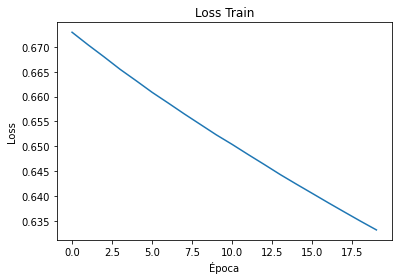

In [ ]:
plt.plot(range(0,20), history2.history['loss'])
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss Train")
plt.show()

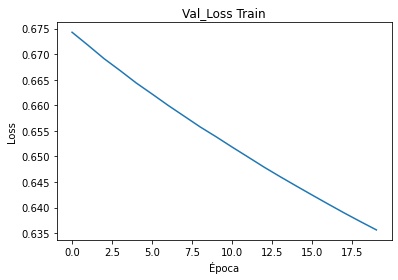

In [ ]:
plt.plot(range(0,20), history2.history['val_loss'])
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Val_Loss Train")
plt.show()

In [ ]:
predictions = model1.predict(x_val_1)
# print((predictions))
model_predictions = [0 if i < 0.5 else 1 for i in predictions]
print("score:", calc_metrics(y_val, model_predictions))

score: (0.6601307189542484, 0.5653008962868118, 0.5196078431372549, 0.47408778424114223)


**Segunda red, imputaciones mediana**


In [ ]:
model2 = Sequential()
# Hidden Layer
model2.add(
    Dense(
        units = 256,
        activation = 'relu'
    )
)
# Output Layer
model2.add(
    Dense(
       units = 1,
       activation= "sigmoid"
    )
)
model2.compile(
tf.keras.optimizers.SGD(
    learning_rate=0.002),
    loss='binary_crossentropy')
history3 = model2.fit( x_tr_2, y_tr, epochs=20,verbose=0, batch_size=100,validation_data=(x_val_2, y_val),)

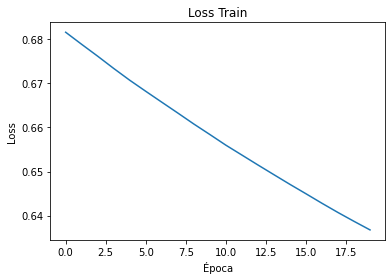

In [ ]:
plt.plot(range(0,20), history3.history['loss'])
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss Train")
plt.show()

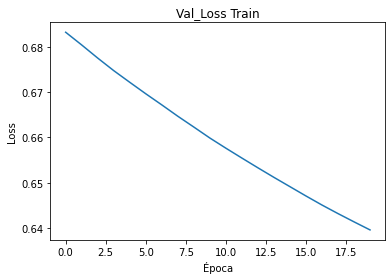

In [ ]:
plt.plot(range(0,20), history3.history['val_loss'])
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Val_Loss Train")
plt.show()

In [ ]:
predictions = model2.predict(x_val_2)
model_predictions2 = [0 if i < 0.5 else 1 for i in predictions]
print("score:", calc_metrics(y_val, model_predictions2))

score: (0.6862745098039216, 0.6358353510895883, 0.607843137254902, 0.6118393234672305)


**Tercera red, mine**


In [ ]:
model3 = Sequential()
# Hidden Layer
model3.add(
    Dense(
        units = 256,
        activation = 'relu'
    )
)
# Output Layer
model3.add(
    Dense(
       units = 1,
       activation= "sigmoid"
    )
)
model3.compile(
tf.keras.optimizers.SGD(
    learning_rate=0.002),
    loss='binary_crossentropy')
history4 = model3.fit( x_tr_3, y_tr, epochs=20, verbose=0,batch_size=100,validation_data=(x_val_3, y_val),)

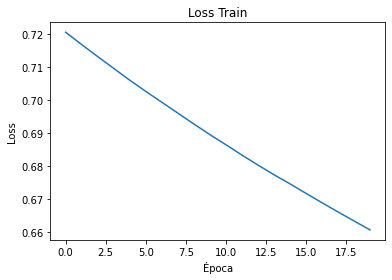

In [ ]:
plt.plot(range(0,20), history4.history['loss'])
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss Train")
plt.show()

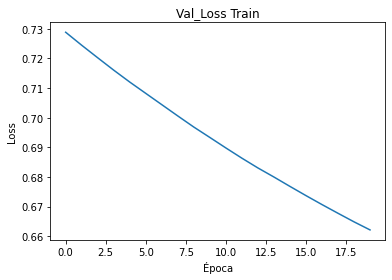

In [ ]:
plt.plot(range(0,20), history4.history['val_loss'])
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Val_Loss Train")
plt.show()

In [ ]:
predictions = model3.predict(x_val_3)
model_predictions3 = [0 if i < 0.5 else 1 for i in predictions]
print("score:", calc_metrics(y_val, model_predictions3))

score: (0.6862745098039216, 0.645113814756672, 0.642156862745098, 0.643495145631068)


Cree y entrene nuevamente la red, esta vez cambiando el _learn rate_ utilizado para el SGD. Pruebe a lo menos un valor mayor y un valor menor al elegido anteriormente. Note que para valores mayores al propuesto puede comenzar a observar fenómeno de divergencia, por lo cual es recomendable agregarle a la red un _callback_, es decir una función que verifica estados y comportamientos de la red mientras se entrena, en particular `TerminateOnNaN`, el cual interrumpirá el proceso de entrenamiento si encuentra un valor NaN. 

Grafique el comportamiento de los errores de validación y entrenamiento y comente.

In [ ]:
model22 = Sequential()
# Hidden Layer
model22.add(
    Dense(
        units = 256,
        activation = 'relu'
    )
)
# Output Layer
model22.add(
    Dense(
       units = 1,
       activation= "sigmoid"
    )
)
model22.compile(
    tf.keras.optimizers.SGD(
    learning_rate=0.001),
    loss='binary_crossentropy')

history21 = model22.fit( x_tr_2, y_tr, epochs=20, batch_size=100,verbose=0,validation_data=(x_val_2, y_val),)


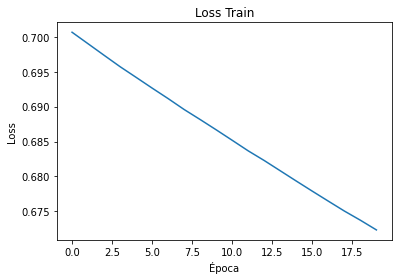

In [ ]:
plt.plot(range(0,20), history21.history['loss'])
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss Train")
plt.show()

In [ ]:
predictions = model22.predict(x_val_2)
model_predictions22 = [0 if i[0] < 0.5 else 1 for i in predictions]
print("score:", calc_metrics(y_val, model_predictions22))

score: (0.6928104575163399, 0.6701193820224719, 0.6862745098039216, 0.6726155246983838)


In [ ]:
from keras.callbacks import TerminateOnNaN

model23 = Sequential()
# Hidden Layer
model23.add(
    Dense(
        units = 256,
        activation = 'relu'
    )
)
# Output Layer
model23.add(
    Dense(
       units = 1,
       activation= "sigmoid"
    )
)
model23.compile(
    tf.keras.optimizers.SGD(
    learning_rate=0.05),

    loss='binary_crossentropy')
history23 = model23.fit( x_tr_2, y_tr, epochs=20, batch_size=100,verbose=0,validation_data=(x_val_2, y_val),)


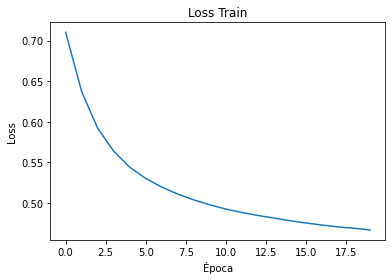

In [ ]:
plt.plot(range(0,20), history23.history['loss'])
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss Train")
plt.show()

In [ ]:
predictions = model23.predict(x_val_2)
model_predictions = [0 if i < 0.5 else 1 for i in predictions]
print("score:", calc_metrics(y_val, model_predictions))

score: (0.7516339869281046, 0.7411012235817576, 0.6666666666666666, 0.678429203539823)


## 1.f Activación y regularizadores $l1$ $l2$
En esta pregunta se les propone explorar distintas funciones de activación y de regularización. En ambos casos debe entrenar la misma red entrenada anteriormente utilizando gradiente descendente estocástico con algun _learn rate_ que le parezca adecuado luego de la exploración en la pregunta anterior. 

* Para explorar distintas funciones de activación, cambie la activación de la capa oculta sucesivamente por: tangente hiperbólica, _Leaky ReLu_, sigmoidea y lineal. Para esto puede basarse en el código presentado abajo y la documentación de keras. Para la activación _Leaky ReLu_ pruebe cambiar el parámetro de la red. Describa sus resultados y si observa diferencias entre las redes. 

* Seleccione la función de activación que mejor resultados le dió y agregue regularización $l1$ a la capa oculta, luego pruebe con $l2$. Pruebe cambiar la tasa de regularización, reportando sus resultados. ¿Qué ocurre si la regularización es muy alta o muy baja? Una vez satisfecho con una tasa de regularización, aplique la regularización a la capa de salida y luego a ambas capas. 

¿Para qué se usan activaciones no lineales? ¿Le parece buena opción la activación sigmoidea para la capa oculta?

¿Cual es la intención de la regularización en general? En particular, ¿Que restricción implicita imponen las regularizaciones $l$1 o $l$2 sobre los pesos de la capa en la cual se aplican? Apoyese de ecuaciones.

In [ ]:
from keras.layers import LeakyReLU
from tensorflow.keras import regularizers

modeltg = Sequential()
# Hidden Layer
modeltg.add(
    Dense(
        kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
        units = 256,
        activation = 'tanh'
    )
)
# Output Layer
modeltg.add(
    Dense(
       units = 1,
       activation= "sigmoid"
    )
)

modeltg.compile(
    tf.keras.optimizers.SGD(
    learning_rate=0.005),
    loss='binary_crossentropy')
historytg = modeltg.fit( x_tr_2, y_tr, verbose=0, epochs=20, batch_size=100,validation_data=(x_val_2, y_val),)
predictions = modeltg.predict(x_val_2)
model_predictions1 = [0 if i < 0.5 else 1 for i in predictions]
scoretg = calc_metrics(y_val, model_predictions1)

In [ ]:
modelrelu = Sequential()
# Hidden Layer
modelrelu.add(
    Dense(
        units = 256,
        activation = 'LeakyReLU'
    )
)
# Output Layer
modelrelu.add(
    Dense(
       units = 1,
       activation= "sigmoid"
    )
)

modelrelu.compile(
    tf.keras.optimizers.SGD(
    learning_rate=0.005),
    loss='binary_crossentropy')
historyrelu = modelrelu.fit( x_tr_2, y_tr, verbose=0, epochs=20, batch_size=100,validation_data=(x_val_2, y_val),)
predictions = modelrelu.predict(x_val_2)

model_predictions2 = [0 if i < 0.5 else 1 for i in predictions]
scorerelu = calc_metrics(y_val, model_predictions2)

In [ ]:
modelsig = Sequential()
# Hidden Layer
modelsig.add(
    Dense(
        units = 256,
        activation = 'sigmoid'
    )
)
# Output Layer
modelsig.add(
    Dense(
       units = 1,
       activation= "sigmoid"
    )
)
modelsig.compile(
    tf.keras.optimizers.SGD(
    learning_rate=0.005),
    loss='binary_crossentropy')
historysig = modelsig.fit( x_tr_2, y_tr, verbose=0, epochs=20, batch_size=100,validation_data=(x_val_2, y_val),)
predictions = modelsig.predict(x_val_2)
model_predictions3 = [0 if i < 0.5 else 1  for i in predictions]
scoresig = calc_metrics(y_val, model_predictions3)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
modelLineal = Sequential()
# Hidden Layer
modelLineal.add(
    Dense(
        units = 256,
        activation = 'linear'
    )
)
# Output Layer
modelLineal.add(
    Dense(
       units = 1,
       activation= "sigmoid"
    )
)
modelLineal.compile(
    tf.keras.optimizers.SGD(
    learning_rate=0.005),
    loss='binary_crossentropy')
historyLineal = modelLineal.fit( x_tr_2, y_tr, epochs=20, batch_size=100,verbose=0,validation_data=(x_val_2, y_val),)
predictions = modelLineal.predict(x_val_2)
predictions
model_predictions4 = [0 if i < 0.5 else 1  for i in predictions]
scoreLineal = calc_metrics(y_val, model_predictions4)

In [ ]:
print("score:", "\n", "tanh: ", scoretg , "\n", "ReLu: ", scorerelu , "\n", "Sig: ", scoresig , "\n", "Lineal: ", scoreLineal , "\n")

score: 
 tanh:  (0.738562091503268, 0.704862579281184, 0.6862745098039216, 0.692894419911682) 
 ReLu:  (0.7712418300653595, 0.7634297520661157, 0.696078431372549, 0.7106812901831541) 
 Sig:  (0.6666666666666666, 0.3333333333333333, 0.5, 0.4) 
 Lineal:  (0.738562091503268, 0.704862579281184, 0.6862745098039216, 0.692894419911682) 



**Regularizadores**

In [ ]:
from keras.layers import LeakyReLU
from tensorflow.keras import regularizers

modeltg = Sequential()
# Hidden Layer
modeltg.add(
    Dense(
        kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
        units = 256,
        activation = 'tanh'
    )
)
# Output Layer
modeltg.add(
    Dense(
       units = 1,
       activation= "sigmoid"
    )
)

modeltg.compile(
    tf.keras.optimizers.SGD(
    learning_rate=0.005),
    loss='binary_crossentropy')
historytgr = modeltg.fit( x_tr_2, y_tr, verbose=0, epochs=20, batch_size=100,validation_data=(x_val_2, y_val),)
predictions = modeltg.predict(x_val_2)
model_predictions1 = [0 if i < 0.5 else 1 for i in predictions]
scoretgr = calc_metrics(y_val, model_predictions1)

In [ ]:
print(scoretgr)

(0.7581699346405228, 0.7394957983193278, 0.6862745098039216, 0.6986425339366515)


## 1.g Exploración del Número de neuronas

Ahora probaremos cambiando el número de neuronas en la capa oculta. Para esto, entrene la red con los hiperparámetros que estimen conveniente luego de la pregunta anterior, variando el numero de neuronas. Deben explorar a lo menos 10 número de neuronas distintos. Una recomendación sería por ejemplo explorar numero de neuronas en potencias de 2. 

Para cada red entrenada, recuperen el mejor error de validación y el error de entrenamiento en la _epoch_ donde se obtuvo tal error de validación. Grafique como se comportan ambos errores a medida crece el número de neuronas y comente. 

In [ ]:
import numpy as np

train_error, val_error = [], []

for n_units in range(56,1024,50):
    # do model 
    modelneu = Sequential()
# Hidden Layer
    modelneu.add(
        Dense(
            units = n_units,
                    kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),

            activation = 'tanh'
        )
    )
    # Output Layer
    modelneu.add(
        Dense(
        units = 1,
        activation= "sigmoid"
        )
    )
    modelneu.compile(
    tf.keras.optimizers.SGD(
        learning_rate=0.005),
        loss='binary_crossentropy')

    historyneu = modelneu.fit( x_tr_2, y_tr, epochs=10, batch_size=100,verbose=0,validation_data=(x_val_2, y_val),)
    predictions = modelneu.predict(x_val_2)

    model_predictionsneu = [0 if i < 0.5 else 1 for i in predictions]
    scoreneu = calc_metrics(y_val, model_predictionsneu)

    aux = historyneu.history['val_loss'][0]
    for x in historyneu.history['val_loss']:
      if x < aux:
        aux = x
    val_error.append(aux)
    #train_error.append([historyneu.history['loss'].index(aux)])
    print(scoreneu)
    # train model
    
    # for instance
print(train_error, val_error)
# . . . .

(0.6601307189542484, 0.6032388663967612, 0.5882352941176471, 0.5907407407407407)
(0.6601307189542484, 0.6230055658627087, 0.6274509803921569, 0.6247169811320754)
(0.7124183006535948, 0.6751373626373627, 0.6715686274509804, 0.6732038834951457)
(0.6928104575163399, 0.6457142857142857, 0.5980392156862745, 0.5990074164947303)
(0.7124183006535948, 0.6728813559322033, 0.6372549019607843, 0.6441860465116279)
(0.7647058823529411, 0.7351844583987441, 0.7303921568627452, 0.7326213592233011)
(0.6928104575163399, 0.6476833976833978, 0.6323529411764706, 0.6369831894593367)
(0.7712418300653595, 0.7461389961389961, 0.7205882352941176, 0.7296683325761018)
(0.7320261437908496, 0.7016806722689075, 0.6568627450980392, 0.6660633484162894)
(0.7777777777777778, 0.7764410364886303, 0.7009803921568627, 0.7167900696864111)
(0.7581699346405228, 0.7276785714285714, 0.7205882352941176, 0.7237593324549847)
(0.7581699346405228, 0.7281987814166031, 0.7303921568627452, 0.7292553445884548)
(0.7516339869281046, 0.72212

## 1.h Dropout
Como seguramente constataron en la pregunta anterior, un numero demasiado grande de parámetros en el modelo puede llevarnos a observar el fenomeno de _overfitting_. Una aproximación a este fenómeno que ha dado excelente resultado en redes neuronales es el método _dropout_, donde estocásticamente se desactivan una fracción de las neuronas al momento del entrenamiento, así efectivamente reduciendo el tamaño del modelo que se entrena en cada iteración e implicitamente obteniendo modelos más robustos por el simple hecho que al momento de entrenar nunca se entrena el "mismo" modelo. 

Según lo aprendido en el ramo, ¿en qué consiste el fenómeno de _overfitting_? ¿Por qué modelos más grandes suelen presentar el fenómeno? 

Entrene la mejor red obtenida en la pregunta anterior agregando una capa de _Dropout_ con parámetro $0.5$ inmediatamente luego de la capa oculta. Repita luego el proceso con una red con el doble de neuronas. Note que el agregar una capa _dropout_ hará que la red entrene más lento, por lo cual es recomendable aumentar el numero de _epochs_ para entrenar la red a completitud. 

¿Qué observa al agregar _dropout_? Comente y compare con sus resultados anteriores. 

In [ ]:
from keras.layers import Dropout

# . . . 

modelneu = Sequential()
modelneu.add(
    Dense(
        units = 256,
        activation = 'relu'
    )
)
# Output Layer
modelneu.add(
    Dense(
    units = 1,
    activation= "sigmoid"
    )
)
modelneu.add(Dropout(0.5))
modelneu.compile(
tf.keras.optimizers.SGD(
    learning_rate=0.005),
    loss='binary_crossentropy')
historyneu = modelneu.fit( x_tr_2, y_tr, epochs=40, batch_size=100,verbose=2,validation_data=(x_val_2, y_val),)
predictions = modelneu.predict(x_val_2)
model_predictionsneu = [0 if i < 0.5 else 1 for i in predictions]
scoreneud = calc_metrics(y_val, model_predictionsneu)


# . . .

Epoch 1/40
6/6 - 1s - loss: 6.1587 - val_loss: 5.1416 - 552ms/epoch - 92ms/step
Epoch 2/40
6/6 - 0s - loss: 5.2754 - val_loss: 5.1416 - 34ms/epoch - 6ms/step
Epoch 3/40
6/6 - 0s - loss: 5.2754 - val_loss: 5.1416 - 37ms/epoch - 6ms/step
Epoch 4/40
6/6 - 0s - loss: 5.2754 - val_loss: 5.1416 - 34ms/epoch - 6ms/step
Epoch 5/40
6/6 - 0s - loss: 5.2754 - val_loss: 5.1416 - 35ms/epoch - 6ms/step
Epoch 6/40
6/6 - 0s - loss: 5.2754 - val_loss: 5.1416 - 36ms/epoch - 6ms/step
Epoch 7/40
6/6 - 0s - loss: 5.2754 - val_loss: 5.1416 - 41ms/epoch - 7ms/step
Epoch 8/40
6/6 - 0s - loss: 5.2754 - val_loss: 5.1416 - 34ms/epoch - 6ms/step
Epoch 9/40
6/6 - 0s - loss: 5.2754 - val_loss: 5.1416 - 34ms/epoch - 6ms/step
Epoch 10/40
6/6 - 0s - loss: 5.2754 - val_loss: 5.1416 - 38ms/epoch - 6ms/step
Epoch 11/40
6/6 - 0s - loss: 5.2754 - val_loss: 5.1416 - 34ms/epoch - 6ms/step
Epoch 12/40
6/6 - 0s - loss: 5.2754 - val_loss: 5.1416 - 35ms/epoch - 6ms/step
Epoch 13/40
6/6 - 0s - loss: 5.2754 - val_loss: 5.1416 - 40

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(scoreneud)

(0.6666666666666666, 0.3333333333333333, 0.5, 0.4)


In [ ]:
from keras.layers import Dropout

# . . . 

modelneu = Sequential()
modelneu.add(
    Dense(
        units = 512,
        activation = 'relu'
    )
)
# Output Layer
modelneu.add(
    Dense(
    units = 1,
    activation= "sigmoid"
    )
)
modelneu.add(Dropout(0.5))
modelneu.compile(
tf.keras.optimizers.SGD(
    learning_rate=0.005),
    loss='binary_crossentropy')
historyneu = modelneu.fit( x_tr_2, y_tr, epochs=40, batch_size=100,verbose=0,validation_data=(x_val_2, y_val),)
predictions = modelneu.predict(x_val_2)
model_predictionsneu = [0 if i < 0.5 else 1 for i in predictions]
scoreneu = calc_metrics(y_val, model_predictionsneu)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 1.i Learning Rate Decay
Ahora entrenaremos un modelo manejando manualmente el _learn rate_. Para esto utilizaremos el _callback_ `LearningRateScheduler`. Este _callback_ nos permitirá implementar una función que maneje el _learn rate_ de nuestro modelo. 

Escriba una función que reciba la epoca actual y retorne un _learn rate_ lr. El lr inicial debe ser igual o mayor a alguno que haya dado buenos resultados en las preguntas anteriores. La función debe dividir por 2 el lr cada 10 _epochs_. Además ponga como restricción que el lr no debe ser menor a $5\times 10^{-5}$, es decir si el valor obtenido es menor a  $5\times 10^{-5}$, la función retorna  $5\times 10^{-5}$.

Entrene su red preferida de las preguntas anteriores con esta modificación, grafique los errores a lo largo del entrenamiento y comente. Según lo visto en el ramo, ¿por qué podría ser util disminuir el _learn rate_ a medida se avanza en el aprendizaje de la red?

In [ ]:
from keras.callbacks import LearningRateScheduler

def step_decay(epoch, lr):
  if lr < 5e-5:
    return 5e-5
  if epoch%10 == 0:
    lr = lr/2
    return lr
  else:
    return lr

schedule = LearningRateScheduler(step_decay)

# model. # . . . 
modelneu = Sequential()
modelneu.add(
    Dense(
        units = 256,
        activation = 'relu'
    )
)
# Output Layer
modelneu.add(
    Dense(
    units = 1,
    activation= "sigmoid"
    )
)
modelneu.compile(
tf.keras.optimizers.SGD(
    learning_rate=0.005),
    loss='binary_crossentropy')
historyneu = modelneu.fit( x_tr_2, y_tr, epochs=50, batch_size=100,verbose=2,validation_data=(x_val_2, y_val),callbacks=[schedule])
predictions = modelneu.predict(x_val_2)
model_predictionsneu = [0 if i < 0.5 else 1 for i in predictions]
scoreneu = calc_metrics(y_val, model_predictionsneu)

Epoch 1/50
6/6 - 1s - loss: 0.6861 - val_loss: 0.6565 - lr: 0.0025 - 513ms/epoch - 85ms/step
Epoch 2/50
6/6 - 0s - loss: 0.6826 - val_loss: 0.6522 - lr: 0.0025 - 34ms/epoch - 6ms/step
Epoch 3/50
6/6 - 0s - loss: 0.6788 - val_loss: 0.6483 - lr: 0.0025 - 32ms/epoch - 5ms/step
Epoch 4/50
6/6 - 0s - loss: 0.6754 - val_loss: 0.6444 - lr: 0.0025 - 40ms/epoch - 7ms/step
Epoch 5/50
6/6 - 0s - loss: 0.6718 - val_loss: 0.6408 - lr: 0.0025 - 34ms/epoch - 6ms/step
Epoch 6/50
6/6 - 0s - loss: 0.6686 - val_loss: 0.6373 - lr: 0.0025 - 33ms/epoch - 5ms/step
Epoch 7/50
6/6 - 0s - loss: 0.6654 - val_loss: 0.6338 - lr: 0.0025 - 34ms/epoch - 6ms/step
Epoch 8/50
6/6 - 0s - loss: 0.6622 - val_loss: 0.6305 - lr: 0.0025 - 33ms/epoch - 6ms/step
Epoch 9/50
6/6 - 0s - loss: 0.6591 - val_loss: 0.6271 - lr: 0.0025 - 51ms/epoch - 8ms/step
Epoch 10/50
6/6 - 0s - loss: 0.6560 - val_loss: 0.6240 - lr: 0.0025 - 53ms/epoch - 9ms/step
Epoch 11/50
6/6 - 0s - loss: 0.6537 - val_loss: 0.6224 - lr: 0.0012 - 39ms/epoch - 7ms/

## 1.j Vanishing Gradient

`Nota:` para esta y las siguientes preguntas solo considere el mejor conjunto de entrenamiento obtenidos a partir de la imputación, es decir, escoja el $X \in \{X_1, X_2, X_3\}$ con el que mejores resultados haya obtenido hasta ahora.

El fenómeno del _vanishing gradient_ es el rápido decaimiento del paso de _Backpropagation_ al avanzar por las capas. A lo largo de la tarea solo hemos entrenado capas con una red oculta, de igual forma que la comunidad cientifica realizo por largo tiempo, por el problema del _vanishing gradient_ y por el teorema de aproximación universal que resumidamente demuestra que una red de una sola capa puede aproximar una amplia familia de funciones. 

En esta pregunta entrenaremos una red neuronal profunda sin implementar ninguno de los dispositivos que permiten hoy en día sortear el problema del _vanishing gradient_, para ponerlo en evidencia. Para esto construya una red con 6 capas ocultas, con la siguiente lista de numero de neuronas: $256$ $256$ $128$ $128$ $32$ y $32$, o con valores similares. De tal manera obtendrá un valor de parámetros relativamente comparable a los valores utilizados en las primeras redes. 

Grafique un histograma con los pesos de las 6 capas densas de la red sin entrenar, entrenela a completitud con el método que estime conveniente y luego grafique nuevamente los histogramas para las 6 capas. Comente lo que observa. 

Luego, pruebe cambiar la inizialización de los pesos de la capa densa, puede revisar la documentación de keras para ver las opciones existentes a parte de `glorot_uniform` por defecto. ¿Se logra solucionar el problema? 

Por último, pruebe aumentar la tasa de aprendizaje para ver si logra hacer que el paso de _backpropagation_ alcance las capas que anteriormente no se entrenaban. ¿Qué observa en este caso? 

In [ ]:
# . . .
modelneu = Sequential()

modelneu.add(
    Dense(
        units = 256,
        activation = 'relu'
    )
)
modelneu.add(
    Dense(
        units = 256,
        activation = 'relu'
    )
)
modelneu.add(
    Dense(
        units = 128,
        activation = 'relu'
    )
)
modelneu.add(
    Dense(
        units = 128,
        activation = 'relu'
    )
)
modelneu.add(
    Dense(
        units = 32,
        activation = 'relu'
    )
)
modelneu.add(
    Dense(
        units = 32,
        activation = 'relu'
    )
)
# Output Layer
modelneu.add(
    Dense(
    units = 1,
    activation= "sigmoid"
    )
)
modelneu.compile(
tf.keras.optimizers.SGD(
    learning_rate=0.005),
    loss='binary_crossentropy')


kernel_initial = []
bias_initial = []


for i in range(6):
  aux = 0
  aux1 = 0
  layer_kernel_weights = modelneu.get_layer(index=i).get_weights()[0]
  layer_bias_weight = modelneu.get_layer(index=i).get_weights()[1]
  for x in layer_kernel_weights:
    for z in x:
      aux+=z
  for m in layer_bias_weight:
    aux1 += m
  kernel_initial.append(aux)
  bias_initial.append(aux1)

print ((bias_initial))


# for one layer
# you can also name your layers and call them by their names if it's less confusing

# . . . 

IndexError: ignored

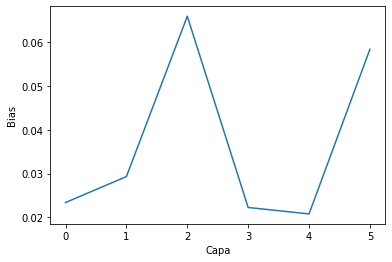

In [ ]:
plt.plot(range(0,6), bias_initial)
plt.xlabel("Capa")
plt.ylabel("Bias")
plt.show()

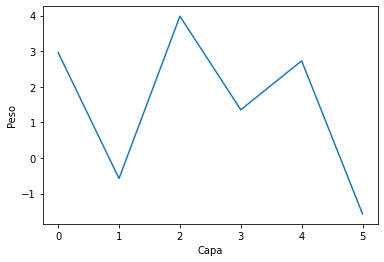

In [ ]:
plt.plot(range(0,6), kernel_initial)
plt.xlabel("Capa")
plt.ylabel("Peso")
plt.show()

In [ ]:
historyneu = modelneu.fit( x_tr_2, y_tr, epochs=20, batch_size=100,verbose=0,validation_data=(x_val_2, y_val),)
predictions = modelneu.predict(x_val_2)
model_predictionsneu = [0 if i < 0.5 else 1 for i in predictions]
scoreneu = calc_metrics(y_val, model_predictionsneu)

## 1.k Batch Normalization

Una manera propuesta de mejorar los desempeños de las redes es Batch Normalization. Entrene nuevamente su red preferida de la pregunta anterior, agregando capas de _Batch Normalization_ antes de cada función de activación. Comente sus resultados. Luego pruebe agregando capas de _Batch Normalization_ después de cada función de activación.

¿Qué realiza _Batch Normalization_ en términos matemáticos?. En términos de aprendizaje, ¿Qué evita la utilización de _Batch Normalization_?

¿Mejoran los desempeños de la red agregando _Batch Normalization_?¿Existe diferencias entre una capa de _Batch Normalization_ justo antes o justo después de la función de activación en términos de aprendizaje? Discuta.

In [ ]:
# . . .
generator_net.add(Dense(...))
generator_net.add(BatchNormalization())
generator_net.add(LeakyReLU())
# . . .

## 1.l Otros Optimizadores

Utilizando la arquitectura de red que mejor se haya desempeñado a lo largo de la tarea, entrene esta red utilizando un optimizador distinto al gradiente descendente estocástico. Pruebe al menos 2 optimizadores implementados en keras (puede utilizar Adam, AdaGrad, AdaDelta, RMSprop, entre otros), también puede probar modificando los parámetros que no hemos utilizado del gradiente descendente estocástico (momentum, momentum de Nesterov...).

Note que por las inicializaciones por defecto de los pesos de las capas y la naturaleza de los datos en cuestión, puede ocurrir que para los valores defecto de algunos optimizadores la red diverga en las primeras iteraciones. Para fijar los parámeros de los optimizadores debe importarlos desde `keras.optimizers` y pasar el objeto con los parámetros deseados al método `.compile` de su modelo. En cambio si con los valores usuales basta, algunos optimizadores pueden pasarse como `string` a `.compile`.

Compare como se desempeñan estos optimizadores con la versión utilizada anteriormente, considerando los tiempos de entrenamiento y el desempeño final alcanzado. Apoyese de gráficos. 

In [ ]:
# . . .
# . . .
modelopt = Sequential()

modelopt.add(
    Dense(
        units = 256,
        activation = 'relu'
    )
)
modelopt.add(
    Dense(
        units = 256,
        activation = 'relu'
    )
)
modelopt.add(
    Dense(
        units = 128,
        activation = 'relu'
    )
)
modelopt.add(
    Dense(
        units = 128,
        activation = 'relu'
    )
)
modelopt.add(
    Dense(
        units = 32,
        activation = 'relu'
    )
)
modelopt.add(
    Dense(
        units = 32,
        activation = 'relu'
    )
)
# Output Layer
modelopt.add(
    Dense(
    units = 1,
    activation= "sigmoid"
    )
)
modelopt.compile(loss='categorical_crossentropy',
optimizer='adam',
historyopt = modelneu.fit( x_tr_2, y_tr, epochs=3, batch_size=100,verbose=2,validation_data=(x_val_2, y_val),)
predictions = modelopt.predict(x_val_2)
model_predictionsneu = [0 if i < 0.5 else 1 for i in predictions]
scoreopt = calc_metrics(y_val, model_predictionsneu)




# for one layer
# you can also name your layers and call them by their names if it's less confusing

# . . . 
opt = Adam(lr=0.0004, decay=1e-10, ...)
ANN.compile(loss='binary_crossentropy', optimizer = optimizer_discriminator, metrics=['accuracy'])

# . . .

## 1.m Testing 

Finalmente, luego de entrenar todos estos modelos estamos en condiciones de probar que tan bien fue nuestro desempeño. Para esto utilice el modelo en el cual obtuvo el mejor desempeño en validación y calcule el error de la predicción realizada sobre el _Test set_. Puede utilizar el metodo `.predict` de su modelo. 

¿Qué tan bien se desempeñaría su modelo en un caso real en vista de lo anterior? 

In [ ]:
# . . .

x_testf = scaler_x1.transform(X_test)

### 2 Audios

In [ ]:
def extract_features(file_name):
  features = []
  audio_data, sample_rate = librosa.load("Train/"+file_name)
  stft = np.abs(librosa.stft(audio_data))
  mfcc = np.mean(librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40).T,axis=0)
  features.extend(mfcc) # 40 = 40\n",
  chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
  features.extend(chroma) # 12 = 52\n",
  mel = np.mean(librosa.feature.melspectrogram(audio_data, sr=sample_rate).T,axis=0)
  features.extend(mel) # 128 = 180\n",
  contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
  features.extend(contrast) # 7 = 187\n",
  # print(\"Features: \",features)\n",
  # print(\"A_data: \",audio_data)\n",
  return (features)
  # Print the ten classes in our dataset\n",
  # path_list = os.listdir(os.path.join(OUTPUT_DIR, 'audio-images'))\n",
  # print(\"Classes: \\n\")\n",
  # for i in range(10):
    # print(path_list[i])\n",
        # # File names for class 1
        # path_list = os.listdir(os.path.join(OUTPUT_DIR, 'audio-images/class_1'))\n"
        # print(\"\\nA few example files: \\n\")\n"
        # for i in range(10):\n"
        #     print(path_list[i])"
def extract_featurest(file_name):
  features = []
  audio_data, sample_rate = librosa.load("Test/"+file_name)
  stft = np.abs(librosa.stft(audio_data))
  mfcc = np.mean(librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40).T,axis=0)
  features.extend(mfcc) # 40 = 40\n",
  chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
  features.extend(chroma) # 12 = 52\n",
  mel = np.mean(librosa.feature.melspectrogram(audio_data, sr=sample_rate).T,axis=0)
  features.extend(mel) # 128 = 180\n",
  contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
  features.extend(contrast) # 7 = 187\n",
  # print(\"Features: \",features)\n",
  # print(\"A_data: \",audio_data)\n",
  return (features)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import wave
import pylab
from pathlib import Path
from scipy import signal
from scipy.io import wavfile
from sklearn.metrics import confusion_matrix
import itertools
import librosa
# from msilib.schema import Feature
from pyexpat import features
# Set paths to input and output data\n",
INPUT_DIR = 'Train/'


# Print names of 10 WAV files from the input path\n",
parent_list = os.listdir(INPUT_DIR)


In [ ]:
  np.load("dict.npy", allow_pickle=True)
  train_audios = pd.read_csv("Train.csv")
  labels = []
  values = []
  for i in range(len(parent_list)):
      values.append(extract_features(parent_list[i]))
      x = train_audios.loc[train_audios['Id'] == parent_list[i]]
      labels.append(x["Expected"])

In [ ]:

scaler = StandardScaler()
new_train = np.array(values)
scaler.fit(new_train)

new_train = scaler.transform(new_train)


In [ ]:
print(type(labels))
y = []
for case3 in labels:
    case2 = case3.values
    case = case2[0].split(" ")
    # print(case[1])
    if case[0] == "0":
        if case[1] == "1":
            y.append(0)
        elif case[1] == "2":
            y.append(1)
        elif case[1] == "3":
            y.append(2)
        elif case[1] == "4":
            y.append(3)
        elif case[1] == "5":
            y.append(4)
        elif case[1] == "6":
            y.append(5)
    elif case[0] == "1":
        if case[1] == "1":
            y.append(6)
        elif case[1] == "2":
            y.append(7)
        elif case[1] == "3":
            y.append(8)
        elif case[1] == "4":
            y.append(9)
        elif case[1] == "5":
            y.append(10)
        elif case[1] == "6":
            y.append(11)

new_y = np.array(y)
new_y


In [ ]:
INPUT_DIRtest = 'Test'

# Print names of 10 WAV files from the input path\n",
parent_listt = os.listdir(INPUT_DIRtest)
for i in range(len(parent_listt)):
  print(parent_listt[i])

In [ ]:
  np.load("dict.npy", allow_pickle=True)
  test_audios = pd.read_csv("Test.csv")
  valuestest = []
  for i in range(len(parent_listt)):
      valuestest.append(extract_featurest(parent_listt[i]))
  

In [ ]:

modelau = Sequential()
modelau.add(Dense(256, activation='relu',  input_dim=new_train.shape[1]))
modelau.add(Dense(128, activation='relu'))
modelau.add(Dense(64, activation='relu'))
modelau.add(Dense(12, activation='softmax')) # sigmoid

modelau.compile(loss='sparse_categorical_crossentropy', optimizer="SGD", metrics=['accuracy'])

In [ ]:
history = modelau.fit(new_train, new_y,
                        epochs=20,
                        batch_size=100,
                        # validation_data=(x_test, y_test),
#                         shuffle=True,
                        verbose=0)

In [ ]:
valuestest = np.array(valuestest)
valuestest = scaler.transform(valuestest)
predictions = modelau.predict((valuestest))
model_pred_f = []
for pred2 in predictions:
    print(pred2)
    pred = str(np.argmax(pred2))
    print(pred)
    if pred == "0":
        model_pred_f.append("0 1")
    elif pred == "1":
        model_pred_f.append("0 2")
    elif pred == "2":
        model_pred_f.append("0 3")
    elif pred == "3":
        model_pred_f.append("0 4")
    elif pred == "4":
        model_pred_f.append("0 5")
    elif pred == "5":
        model_pred_f.append("0 6")
    elif pred == "6":
        model_pred_f.append("1 1")
    elif pred == "7":
        model_pred_f.append("1 2")
    elif pred == "8":
        model_pred_f.append("1 3")
    elif pred == "9":
        model_pred_f.append("1 4")
    elif pred == "10":
        model_pred_f.append("1 5")
    elif pred == "11":
        model_pred_f.append("1 6")
import csv
submission = []
fields = ["Id","Expected"]
for i in range(len(parent_listt)):
    submission.append( [parent_listt[i], model_pred_f[i]])

  
with open('GFG', 'w') as f:
    # using csv.writer method from CSV package
    write = csv.writer(f)
    write.writerow(fields)
    write.writerows(submission)


#Separando la prediccion de sexo y nacionalidad

In [ ]:
print(type(labels))
y2 = []
y3 = []
for case3 in labels:
    case2 = case3.values
    case = case2[0].split(" ")
    # print(case[1])
    if case[0] == "0":
      y3.append(0)
      if case[1] == "1":
          y2.append(0)
      elif case[1] == "2":
          y2.append(1)
      elif case[1] == "3":
          y2.append(2)
      elif case[1] == "4":
          y2.append(3)
      elif case[1] == "5":
          y2.append(4)
      elif case[1] == "6":
          y2.append(5)
    else:
      y3.append(1)
      if case[1] == "1":
          y2.append(0)
      elif case[1] == "2":
          y2.append(1)
      elif case[1] == "3":
          y2.append(2)
      elif case[1] == "4":
          y2.append(3)
      elif case[1] == "5":
          y2.append(4)
      elif case[1] == "6":
          y2.append(5)


new_y2 = np.array(y2)
new_y3 = np.array(y3)


In [ ]:


modelpais = Sequential()
modelpais.add(Dense(256, activation='relu',  input_dim=new_train.shape[1]))
modelpais.add(Dense(128, activation='relu'))
modelpais.add(Dense(64, activation='relu'))
modelpais.add(Dense(12, activation='softmax')) # sigmoid

modelpais.compile(loss='sparse_categorical_crossentropy', optimizer="SGD", metrics=['accuracy'])

historypais = modelpais.fit(new_train, new_y2,
                        epochs=20,
                        batch_size=100,
                        # validation_data=(x_test, y_test),
#                         shuffle=True,
                        verbose=0)

In [ ]:

modelsex = Sequential()
modelsex.add(Dense(256, activation='relu',  input_dim=new_train.shape[1]))
modelsex.add(Dense(128, activation='relu'))
modelsex.add(Dense(64, activation='relu'))
modelsex.add(Dense(1, activation='sigmoid')) # sigmoid

modelsex.compile(loss='binary_crossentropy', optimizer="SGD", metrics=['accuracy'])

historysex = modelsex.fit(new_train, new_y3,
                        epochs=20,
                        batch_size=100,
                        verbose=0)

In [ ]:
predictionspais = modelpais.predict(np.array(valuestest))
predictionsEX = modelsex.predict(np.array(valuestest))
model_pred_f = []
for pred2 in range(len(predictionsEX)-1):
    sex = predictionsEX[pred2]
    pais = predictionspais[pred2]
    print(pred2)
    pred = str(np.argmax(pred2))
    print(pred)
    
    if sex == "0":
      if pred == "0":
          model_pred_f.append("0 1")
      elif pred == "1":
          model_pred_f.append("0 2")
      elif pred == "2":
          model_pred_f.append("0 3")
      elif pred == "3":
          model_pred_f.append("0 4")
      elif pred == "4":
          model_pred_f.append("0 5")
      elif pred == "5":
          model_pred_f.append("0 6")
    else:
      if pred == "1":
          model_pred_f.append("1 1")
      elif pred == "1":
          model_pred_f.append("1 2")
      elif pred == "2":
          model_pred_f.append("1 3")
      elif pred == "3":
          model_pred_f.append("1 4")
      elif pred == "4":
          model_pred_f.append("1 5")
      elif pred == "5":
          model_pred_f.append("1 6")

import csv
submission = []
fields = ["Id","Expected"]
for i in range(len(model_pred_f)):
    submission.append( [parent_listt[i], model_pred_f[i]])

  
with open('GFG', 'w') as f:
    # using csv.writer method from CSV package
    write = csv.writer(f)
    write.writerow(fields)
    write.writerows(submission)

